# HGX — Random Generation, Projection & Drawing (mini hypergraph)

This short notebook uses **Hypergraphx (HGX)** to:

- generate a tiny random hypergraph (seeded),
- **draw** it via `hypergraphx.viz.draw_hypergraph.draw_hypergraph`,
- make the hypergraph **connected** by adding random edges,
- build a **2-clique projection** via `hypergraphx.representations.projection.clique_projection(h, keep_isolated=False)`,
- plot the **node degree distribution** and **hyperedge size distribution**,
- and visualize the **clique projection** using **networkx**.

We keep it tiny: **10 nodes**, **5 hyperedges** to start; we then add edges until connected.


In [13]:
# Imports
from hypergraphx.generation.random import random_hypergraph, add_random_edge
from hypergraphx.viz.draw_hypergraph import draw_hypergraph
from hypergraphx.representations.projections import clique_projection
from hypergraphx.core.hypergraph import Hypergraph
import matplotlib.pyplot as plt
import networkx as nx
import random

# Config
SEED = 2025
random.seed(SEED)
n = 10
edges_by_size = {2: 3, 3: 2}  # total = 5

In [14]:
# 1) Generate the base hypergraph (seeded)
hg = random_hypergraph(num_nodes=n, num_edges_by_size=edges_by_size, seed=SEED)

print("Base HG summary:")
print("  Nodes:", hg.num_nodes(), "Edges:", hg.num_edges())
print("  Edge-size distribution (via HGX):", dict(sorted(hg.distribution_sizes().items())))

print("\nEdges (as tuples of node labels):")
for e in hg.get_edges():
    print(tuple(map(str, e)))

Base HG summary:
  Nodes: 10 Edges: 5
  Edge-size distribution (via HGX): {2: 3, 3: 2}

Edges (as tuples of node labels):
('0', '8')
('1', '8')
('2', '7')
('3', '5', '6')
('1', '6', '8')


In [15]:
# 2) Ensure the hypergraph is connected by adding random edges of size 2..4
#    (We keep edges unique; we use HGX's largest_component_size() to check connectivity)
nodes = list(map(str, hg.get_nodes()))
seen = {frozenset(map(str, e)) for e in hg.get_edges()}

def is_connected(H):
    return int(H.largest_component_size()) == H.num_nodes()

added = 0
while not is_connected(hg):
    s = random.randint(2, 4)
    add_random_edge(hg, size=s)
    added += 1

print(f"Added {added} edges to make the hypergraph connected.")
print("Now: Nodes =", hg.num_nodes(), "Edges =", hg.num_edges())

Added 9 edges to make the hypergraph connected.
Now: Nodes = 10 Edges = 13


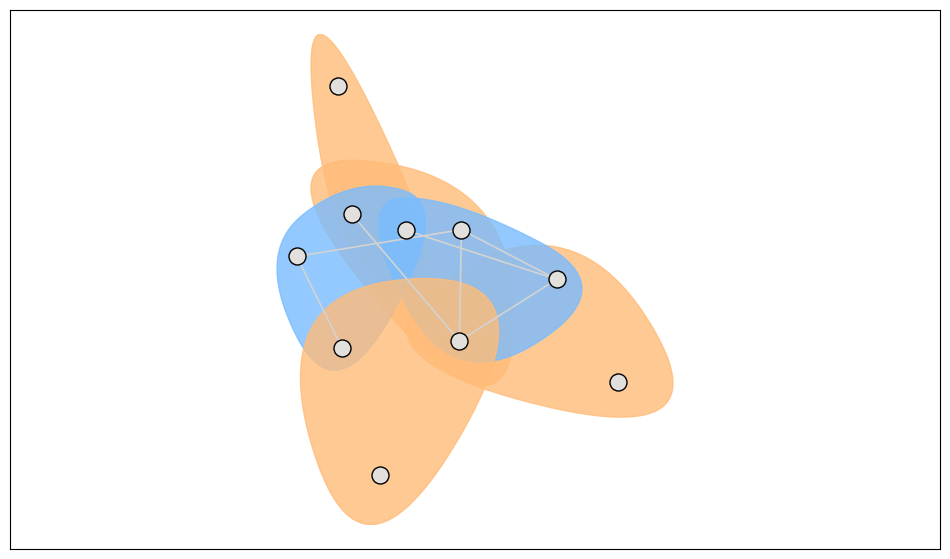

In [16]:
# 3) Draw the hypergraph using HGX's visualization API
draw_hypergraph(hg)

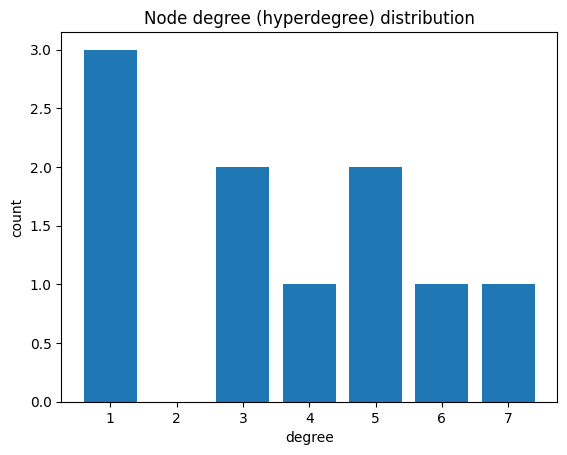

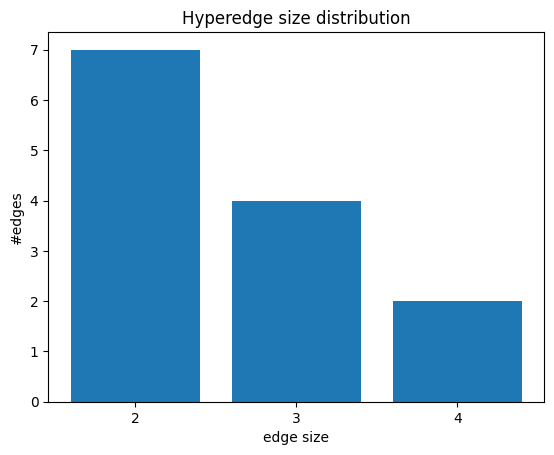

In [17]:
# 4) Node degree distribution (hyperdegree) and hyperedge size distribution
# Node degrees (via HGX degree API)
degrees = [hg.degree(u) for u in hg.get_nodes()]

plt.figure()
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8)
plt.title("Node degree (hyperdegree) distribution")
plt.xlabel("degree"); plt.ylabel("count")
plt.show()

# Hyperedge size distribution (via HGX distribution_sizes API)
sizes = dict(sorted(hg.distribution_sizes().items()))
plt.figure()
plt.bar([str(k) for k in sizes.keys()], list(sizes.values()))
plt.title("Hyperedge size distribution")
plt.xlabel("edge size"); plt.ylabel("#edges")
plt.show()

Projection graph: |V| = 10 |E| = 22


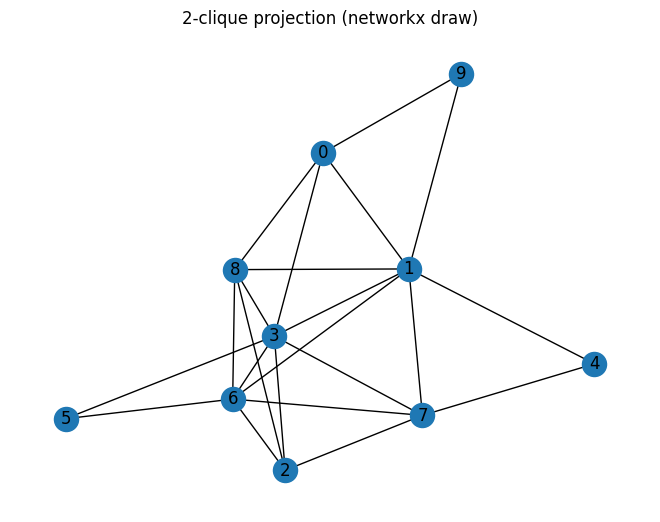

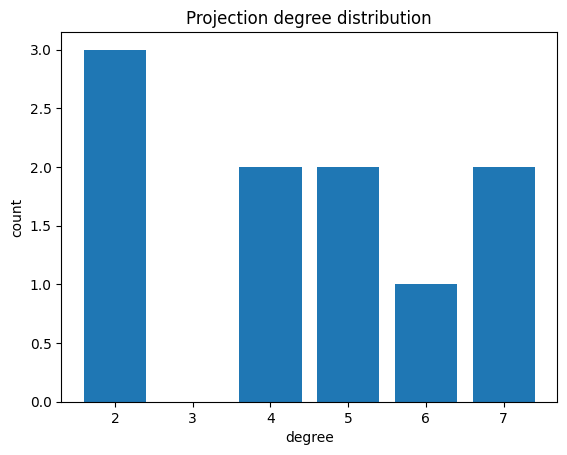

In [18]:
# 5) 2-clique projection via HGX, and visualize with networkx
G = clique_projection(hg, keep_isolated=False)  # expected to return a networkx.Graph
print("Projection graph: |V| =", G.number_of_nodes(), "|E| =", G.number_of_edges())

plt.figure()
pos = nx.spring_layout(G, seed=SEED)
nx.draw(G, pos, with_labels=True)
plt.title("2-clique projection (networkx draw)")
plt.show()

# Degree histogram of the projection
proj_degrees = [d for _, d in G.degree()]
plt.figure()

plt.hist(proj_degrees, bins=range(min(proj_degrees), max(proj_degrees) + 2), align='left', rwidth=0.8)

plt.title("Projection degree distribution")
plt.xlabel("degree"); plt.ylabel("count")
plt.show()